In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [17]:
# Import data
data = pd.read_csv("./Beverages.csv")
data.head()

,Name,Age,TEA_consumption,Coffee_consumption,EnergyDrinks_consumption,SoftDrinks_consumption,Milk_consumption,Juices_consumption,TEA_sleepingPattern,Coffee_sleepingPattern,EnergyDrinks_sleepingPattern,SoftDrinks_sleepingPattern,Milk_sleepingPattern,Juices_sleepingPattern,SleepingSchedule,BeveragesAfftectingSleep
0,Yagnesh,below 20 yrs,1,0,0,0,1,0,sleep late,sleep late,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,7-8 hrs,Yes
1,Omikumar Makadia,20 - 30 yrs,2,3,0,1,1,0,remains the same sleeping routine with or with...,sleep late,sleep late,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,7-8 hrs,Yes
2,Devyash Shah,20 - 30 yrs,0,2,0,1,0,1,I don't drink,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,5-6 hrs,No
3,Om Shah,below 20 yrs,2,2,0,0,1,1,sleep late,sleep late,I don't drink,I don't drink,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,above 10 hrs,No
4,Sarthak dave,20 - 30 yrs,3,3,1,1,1,0,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,remains the same sleeping routine with or with...,sleep early,remains the same sleeping routine with or with...,7-8 hrs,No


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          72 non-null     object
 1   Age                           72 non-null     object
 2   TEA_consumption               72 non-null     int64 
 3   Coffee_consumption            72 non-null     int64 
 4   EnergyDrinks_consumption      72 non-null     int64 
 5   SoftDrinks_consumption        72 non-null     int64 
 6   Milk_consumption              72 non-null     int64 
 7   Juices_consumption            72 non-null     int64 
 8   TEA_sleepingPattern           72 non-null     object
 9   Coffee_sleepingPattern        72 non-null     object
 10  EnergyDrinks_sleepingPattern  72 non-null     object
 11  SoftDrinks_sleepingPattern    72 non-null     object
 12  Milk_sleepingPattern          72 non-null     object
 13  Juices_sleepingPattern

In [19]:
# Count frequency of each label in the "age" column
age_counts = data['Age'].value_counts()

# Print the frequency counts
print(age_counts)

20 - 30 yrs     48
below 20 yrs    22
40 -50 yrs       2
Name: Age, dtype: int64


20 - 30 yrs:    48
below 20 yrs:    22
40 -50 yrs:    2


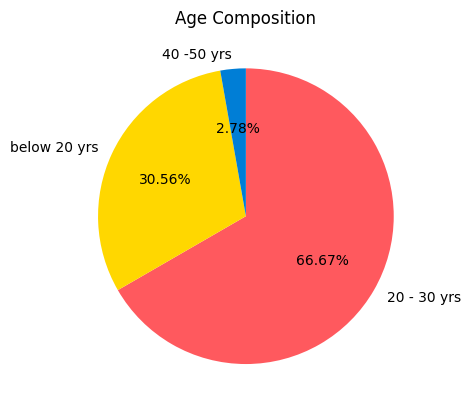

In [20]:
ageCount = {}

for ageVal, count in data['Age'].value_counts().items():
  ageCount[ageVal] = count
  print (f'{ageVal}:    {count}')

# print(ageCount)


plt.pie(ageCount.values(), labels = ageCount.keys(), autopct='%1.2f%%',colors=[
        "#ff595e", 'gold', "#007ED6", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title("Age Composition")

# Display the pie chart
plt.show()

1:    20
2:    20
0:    20
3:    10
4:    2


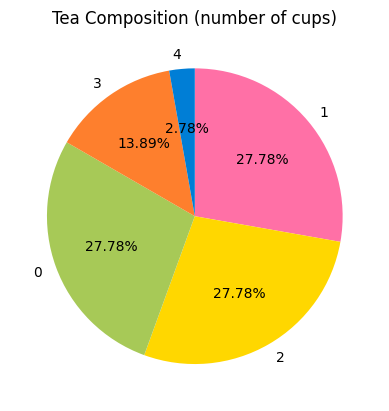

In [21]:
CupCount = {}

for DrinkVal, count in data['TEA_consumption'].value_counts().items():
  CupCount[DrinkVal] = count
  print (f'{DrinkVal}:    {count}')

plt.pie(CupCount.values(), labels = CupCount.keys(), autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f8409"],startangle=90,counterclock=False)
plt.title('Tea Composition (number of cups)')

# Display the pie chart
plt.show()

0:    28
1:    23
2:    10
3:    8
4:    3


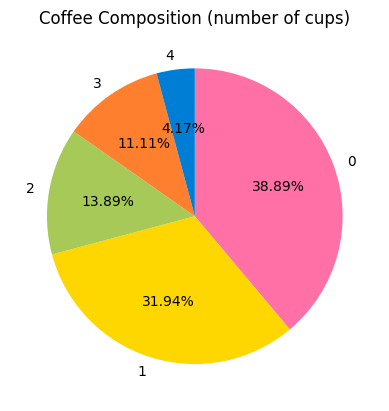

In [22]:
CupCount = {}

for DrinkVal, count in data['Coffee_consumption'].value_counts().items():
  CupCount[DrinkVal] = count
  print (f'{DrinkVal}:    {count}')

plt.pie(CupCount.values(), labels = CupCount.keys(), autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","9f86c0"],startangle=90,counterclock=False)
plt.title('Coffee Composition (number of cups)')

# Display the pie chart
plt.show()

0:    52
1:    18
2:    2


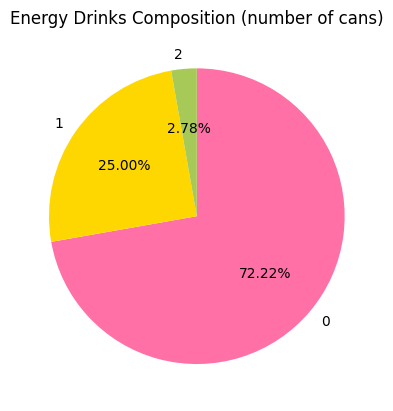

In [23]:
CupCount = {}

for DrinkVal, count in data['EnergyDrinks_consumption'].value_counts().items():
  CupCount[DrinkVal] = count
  print (f'{DrinkVal}:    {count}')

plt.pie(CupCount.values(), labels = CupCount.keys(), autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Energy Drinks Composition (number of cans)')

# Display the pie chart
plt.show()

1:    36
0:    22
2:    9
3:    5


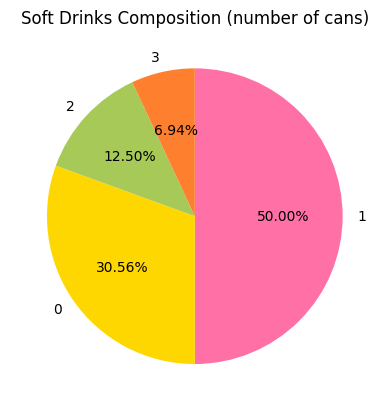

In [24]:
CupCount = {}

for DrinkVal, count in data['SoftDrinks_consumption'].value_counts().items():
  CupCount[DrinkVal] = count
  print (f'{DrinkVal}:    {count}')

plt.pie(CupCount.values(), labels = CupCount.keys(), autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Soft Drinks Composition (number of cans)')

# Display the pie chart
plt.show()

1:    25
2:    23
0:    11
5:    6
3:    5
4:    2


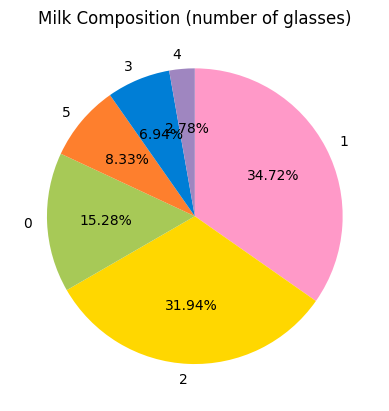

In [25]:
CupCount = {}

for DrinkVal, count in data['Milk_consumption'].value_counts().items():
  CupCount[DrinkVal] = count
  print (f'{DrinkVal}:    {count}')

plt.pie(CupCount.values(), labels = CupCount.keys(), autopct='%1.2f%%',colors=[
        "#ff99c8", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Milk Composition (number of glasses)')

# Display the pie chart
plt.show()

1:    32
0:    17
2:    12
3:    8
4:    3


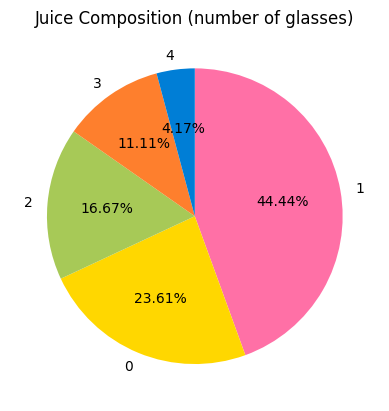

In [26]:
CupCount = {}

for DrinkVal, count in data['Juices_consumption'].value_counts().items():
  CupCount[DrinkVal] = count
  print (f'{DrinkVal}:    {count}')

plt.pie(CupCount.values(), labels = CupCount.keys(), autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Juice Composition (number of glasses)')

# Display the pie chart
plt.show()

In [27]:
# Count1 = {}
# Count2 = {}
# Count3 = {}
# Count4 = {}
# Count5 = {}
# Count6 = {}
# for DrinkVal, count in data['TEA_consumption'].value_counts().items():
#   Count1[DrinkVal] = count
#   #print (f'{DrinkVal}:    {count}')

# for DrinkVal, count in data['Coffee_consumption'].value_counts().items():
#   Count2[DrinkVal] = count
#   #print (f'{DrinkVal}:    {count}')

# for DrinkVal, count in data['EnergyDrinks_consumption'].value_counts().items():
#   Count3[DrinkVal] = count
#   #print (f'{DrinkVal}:    {count}')

# for DrinkVal, count in data['SoftDrinks_consumption'].value_counts().items():
#   Count4[DrinkVal] = count
#   #print (f'{DrinkVal}:    {count}')

# for DrinkVal, count in data['Milk_consumption'].value_counts().items():
#   Count5[DrinkVal] = count
#   #print (f'{DrinkVal}:    {count}')

# for DrinkVal, count in data['Juices_consumption'].value_counts().items():
#   Count6[DrinkVal] = count
#   #print (f'{DrinkVal}:    {count}')
  
# N = 6
# r = np.arange(N) 
# width = 0.25
  
  
# bar1 = plt.bar(r, Count1, width, color = 'r')
# bar2 = plt.bar(r+width, Count2, width, color='g')
# bar3 = plt.bar(r+width*2, Count3, width, color = 'b')
# bar4 = plt.bar(r+width*3, Count4, width, color = 'r')
# bar5 = plt.bar(r+width*5, Count5, width, color='g')
# bar6 = plt.bar(r+width*6, Count6, width, color = 'b')
  
# plt.xlabel("Types of Beverage")
# plt.ylabel("Number of people voted")
# plt.title("Number of people voted in each year")
  
# # plt.grid(linestyle='--')
# plt.xticks(r + width/2,['Tea','Coffee','Energy Drinks','Soft Drinks','Milk','Juice'])
# plt.legend()
  
# plt.show()

remains the same sleeping routine with or without drinking:    39
I don't drink:    25
sleep late:    7
sleep early:    1


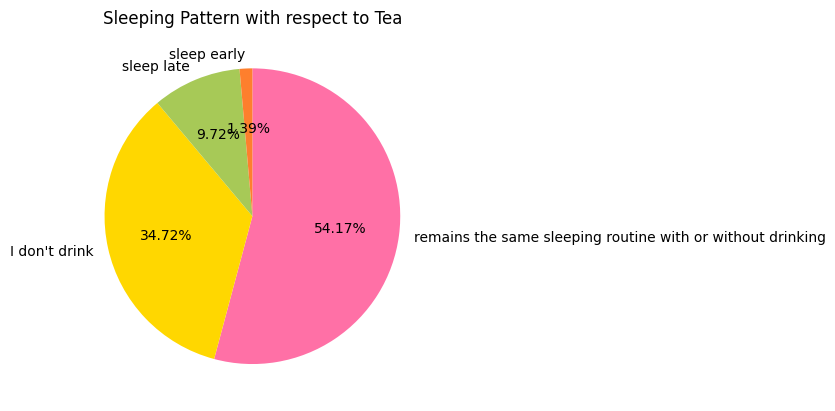

In [28]:
SCount = {}

for SVal, count in data['TEA_sleepingPattern'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

plt.pie(SCount.values(), labels = SCount.keys(),autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Sleeping Pattern with respect to Tea')
# plt.legend(labels = SCount.keys())

# Display the pie chart
plt.show()

remains the same sleeping routine with or without drinking:    26
I don't drink:    25
sleep late:    19
sleep early:    2


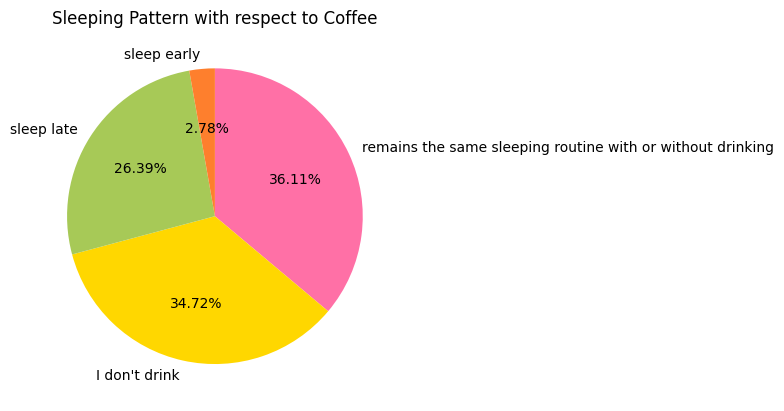

In [29]:
SCount = {}

for SVal, count in data['Coffee_sleepingPattern'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

plt.pie(SCount.values(), labels = SCount.keys(),autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Sleeping Pattern with respect to Coffee')
# plt.legend(labels = SCount.keys())

# Display the pie chart
plt.show()

I don't drink:    39
remains the same sleeping routine with or without drinking:    20
sleep late:    11
sleep early:    2


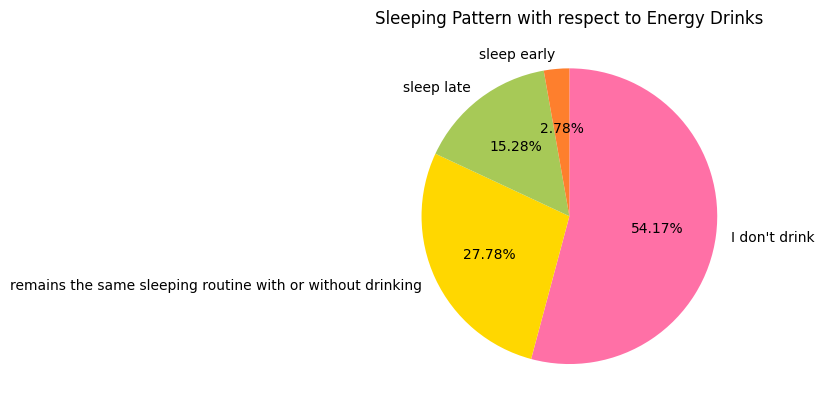

In [30]:
SCount = {}

for SVal, count in data['EnergyDrinks_sleepingPattern'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

plt.pie(SCount.values(), labels = SCount.keys(),autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Sleeping Pattern with respect to Energy Drinks')
# plt.legend(labels = SCount.keys())

# Display the pie chart
plt.show()

remains the same sleeping routine with or without drinking:    45
I don't drink:    19
sleep late:    5
sleep early:    3


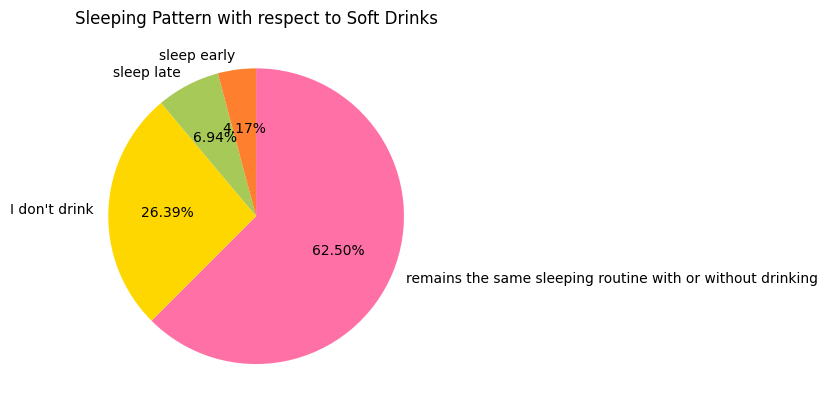

In [31]:
SCount = {}

for SVal, count in data['SoftDrinks_sleepingPattern'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

plt.pie(SCount.values(), labels = SCount.keys(),autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Sleeping Pattern with respect to Soft Drinks')
# plt.legend(labels = SCount.keys())

# Display the pie chart
plt.show()

remains the same sleeping routine with or without drinking:    50
sleep early:    12
I don't drink:    7
sleep late:    3


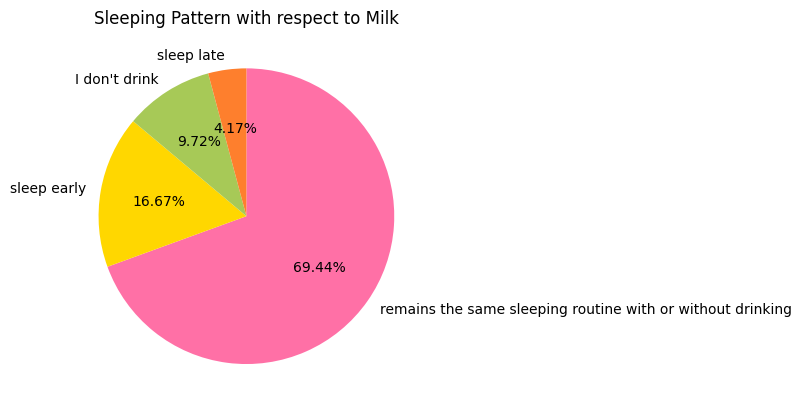

In [32]:
SCount = {}

for SVal, count in data['Milk_sleepingPattern'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

plt.pie(SCount.values(), labels = SCount.keys(),autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Sleeping Pattern with respect to Milk')
# plt.legend(labels = SCount.keys())

# Display the pie chart
plt.show()

remains the same sleeping routine with or without drinking:    51
I don't drink:    14
sleep early:    6
sleep late:    1


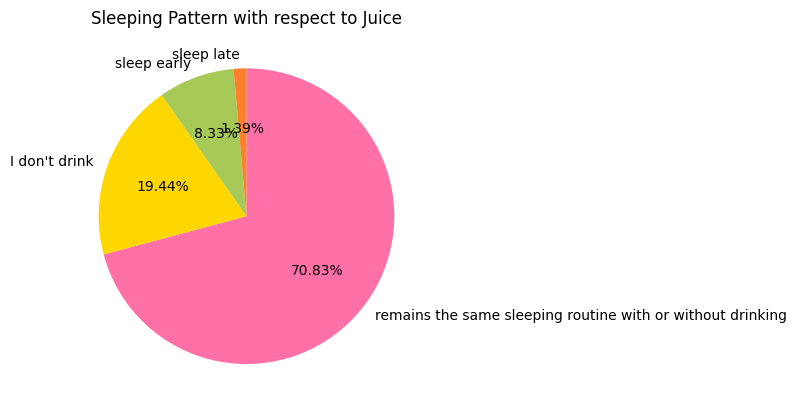

In [33]:
SCount = {}

for SVal, count in data['Juices_sleepingPattern'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

plt.pie(SCount.values(), labels = SCount.keys(),autopct='%1.2f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"],startangle=90,counterclock=False)
plt.title('Sleeping Pattern with respect to Juice')
# plt.legend(labels = SCount.keys())
# plt.legend(loc="center")
# Display the pie chart
plt.show()

7-8 hrs:    32
5-6 hrs:    31
9-10 hrs:    5
2-4 hrs:    3
above 10 hrs:    1


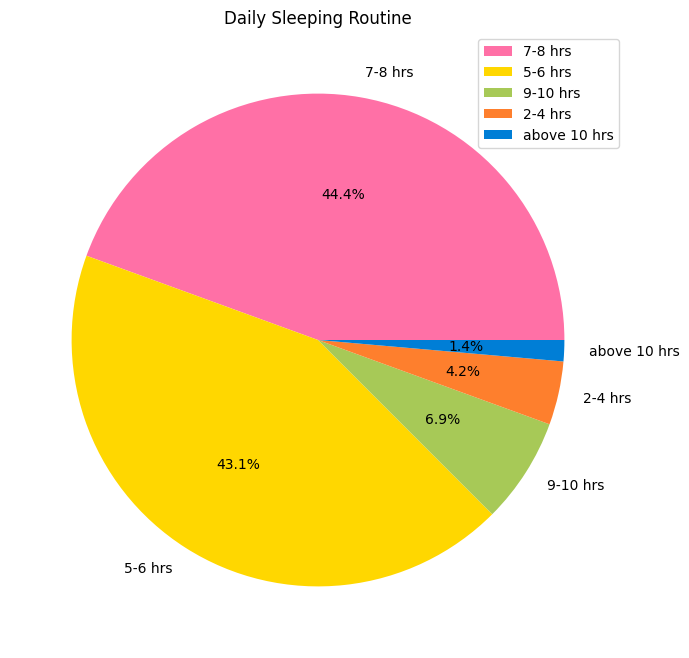

In [34]:
SCount = {}

for SVal, count in data['SleepingSchedule'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

# # Change label fontsize

# textprops = {"fontsize":5}


plt.figure(figsize=(8,8))
plt.pie(SCount.values(), labels = SCount.keys(),autopct='%.1f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"])
plt.title('Daily Sleeping Routine')
# plt.legend(labels = SCount.keys())
plt.legend()

# # Display the pie chart
plt.show()

No:    50
Yes:    22


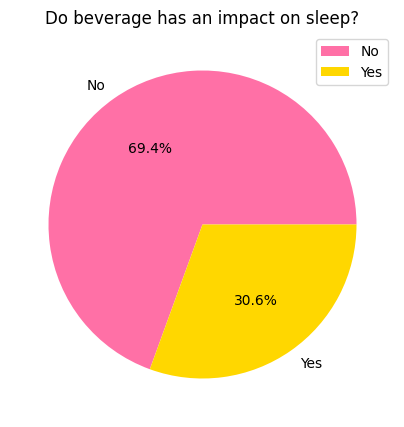

In [35]:
SCount = {}

for SVal, count in data['BeveragesAfftectingSleep'].value_counts().items():
  SCount[SVal] = count
  print (f'{SVal}:    {count}')

# # Change label fontsize

# textprops = {"fontsize":5}


plt.figure(figsize=(5,5))
plt.pie(SCount.values(), labels = SCount.keys(),autopct='%.1f%%',colors=[
        "#ff70a6", 'gold', "#a7c957", "#fe7f2d", "#007ED6","#9f86c0"])
plt.title('Do beverage has an impact on sleep?')
# plt.legend(labels = SCount.keys())
plt.legend()

# # Display the pie chart
plt.show()

In [36]:
age = data['Age'].value_counts()
sleepsch = data['SleepingSchedule'].value_counts()
age


20 - 30 yrs     48
below 20 yrs    22
40 -50 yrs       2
Name: Age, dtype: int64

In [37]:
sleepsch

7-8 hrs         32
5-6 hrs         31
9-10 hrs         5
2-4 hrs          3
above 10 hrs     1
Name: SleepingSchedule, dtype: int64

In [38]:
drink = data['TEA_consumption'].value_counts()
sleepsch = data['TEA_sleepingPattern'].value_counts()



Text(0.5, 1.0, 'Juice')

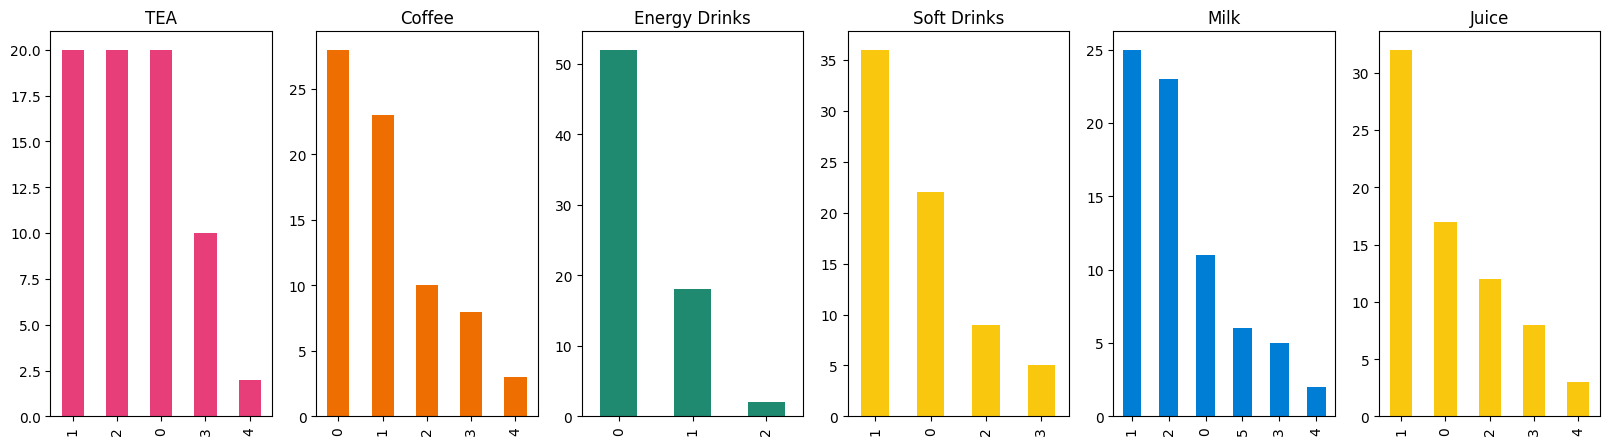

In [39]:
# make subplots of graphs for tea, coffee, energy drinks and other
fig, ax = plt.subplots(1,6, figsize=(20,5))

# set bar color to blue
# plt.bar(data['TEA_consumption'], color='red')
data['TEA_consumption'].value_counts().plot(kind='bar', ax=ax[0], color='#E73E79')
# give heading
ax[0].set_title('TEA')

data['Coffee_consumption'].value_counts().plot(kind='bar', ax=ax[1], color='#EE6E01')
ax[1].set_title('Coffee')

data['EnergyDrinks_consumption'].value_counts().plot(kind='bar', ax=ax[2], color='#1F8A70')
ax[2].set_title('Energy Drinks')

data['SoftDrinks_consumption'].value_counts().plot(kind='bar', ax=ax[3], color='#F9C80E')
ax[3].set_title('Soft Drinks')

data['Milk_consumption'].value_counts().plot(kind='bar', ax=ax[4], color='#007ED6')
ax[4].set_title('Milk')

data['Juices_consumption'].value_counts().plot(kind='bar', ax=ax[5], color='#F9C80E')
ax[5].set_title('Juice')


# change colors of bars


# Correlation

In [ ]:
# Import data
data1 = pd.read_csv("./DataEncoding.csv")
data1.head()

,Unnamed: 0,Name,Age,TEA_consumption,Coffee_consumption,EnergyDrinks_consumption,SoftDrinks_consumption,Milk_consumption,Juices_consumption,TEA_sleepingPattern,Coffee_sleepingPattern,EnergyDrinks_sleepingPattern,SoftDrinks_sleepingPattern,Milk_sleepingPattern,Juices_sleepingPattern,SleepingSchedule,BeveragesAfftectingSleep
0,0,Yagnesh,2,1,0,0,0,1,0,3,3,2,2,2,2,2,1
1,1,Omikumar Makadia,0,2,3,0,1,1,0,2,3,3,2,2,2,2,1
2,2,Devyash Shah,0,0,2,0,1,0,1,0,2,2,2,2,2,1,0
3,3,Om Shah,2,2,2,0,0,1,1,3,3,0,0,2,2,4,0
4,4,Sarthak dave,0,3,3,1,1,1,0,2,2,2,2,1,2,2,0


In [ ]:
data1 = data1.iloc[:,1:]

In [ ]:

corr_matrix = data1.corr()
print(corr_matrix)

                                   Age  TEA_consumption  Coffee_consumption  \
Age                           1.000000         0.209984           -0.084707   
TEA_consumption               0.209984         1.000000            0.091706   
Coffee_consumption           -0.084707         0.091706            1.000000   
EnergyDrinks_consumption      0.144648         0.219100            0.182431   
SoftDrinks_consumption        0.052524         0.165072            0.189876   
Milk_consumption             -0.294904         0.076477            0.320673   
Juices_consumption           -0.138319        -0.119597            0.067954   
TEA_sleepingPattern           0.215516         0.741805           -0.053426   
Coffee_sleepingPattern        0.013524        -0.052482            0.645728   
EnergyDrinks_sleepingPattern  0.127695         0.051496            0.157804   
SoftDrinks_sleepingPattern   -0.015811         0.117686           -0.031355   
Milk_sleepingPattern         -0.178668         0.058

<ipython-input-220-cbcda3c67961>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data1.corr()


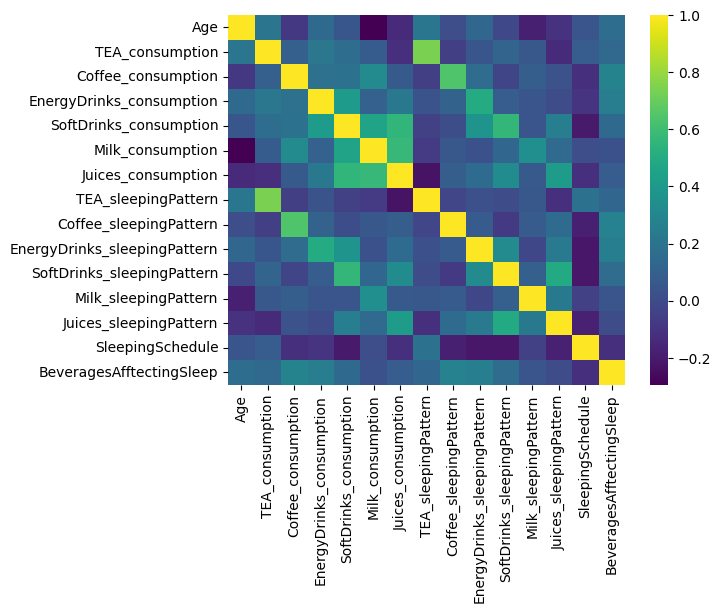

In [ ]:
sns.heatmap(corr_matrix, cmap='viridis')

# show the plot
plt.show()